# Udacity Survey Data Analysis: A Professional Overview

## Project Overview

This analysis examines a Udacity survey of 753 learners to uncover actionable insights into their demographics, motivations, learning behaviors, and overall satisfaction. The findings will inform program design, marketing outreach, and support services, ensuring Udacity delivers maximum value to its students.
                                                                                



```
# This is formatted as code`
```

   
                                                                             

## Dataset Summary

- **Size:** 753 respondents, 55 columns  
- **Key Domains:**  
  - Demographics (birthdate, location)  
  - Career & Employment (status, role, industry, experience)  
  - Learning Motivations & Habits (reasons for enrollment, study routines, resources used)  
  - Udacity Engagement (swag preferences, slogan feedback, course history, recommendation likelihood)  
  

---

## Analytical Approach

### Data Ingestion & Initial Audit

1. Loaded `surveydata3 (1).csv` into a pandas DataFrame.  
2. Assessed schema, row count, and missing-value patterns.  
3. Flagged redundant `Unnamed` and sparse `Other` columns for removal.

### Data Cleaning & Preparation

- **Column Pruning:** Eliminated noninformative and heavily incomplete fields.  
- **Date Parsing:** Converted birthdate strings to `datetime`, relegating invalid entries to `NaT`.  
- **Standardization:** Unified “Not Applicable” in job levels as missing.  
- **Imputation:**  
  - Numerical fields (e.g., sleep hours, commute time) → median values.  
  - Categorical fields (e.g., career goals, education level) → mode values.

### Exploratory Data Analysis

- Calculated descriptive statistics for all quantitative fields.  
- Mapped frequency distributions for major categorical variables.  
- Verified that imputations resolved nearly all missing values, except for unparsed birthdates.

---

## Detailed Insights & Visualizations

### 1. Motivations for Enrollment

- A horizontal bar chart quantifies each reason’s share.  
- Top drivers: career transition, skill enhancement, and personal growth.

### 2. Recommendation Likelihood by Education Level

- A stacked bar plot contrasts Net Promoter scores (1–10) across education tiers.  
- Finding: High recommendation rates persist regardless of formal academic attainment.

### 3. Occupation vs. Course Motivation (Interactive)

- A sunburst chart layers occupations, roles, and motivations.  
- Drill down in `plots/chart3_occupation_course_reason_sunburst.html` for dynamic exploration.

### 4. Weekly Project Hours

- A histogram reveals that most learners dedicate 5–10 hours per week to hands-on work.

### 5. Experience by Job Level

- A box plot delineates years of experience across contributor, manager, and executive levels.

### 6. Occupational Breakdown

- A bar chart highlights the prevalence of software, data, and business roles among respondents.

### 7. Correlation Matrix

- A heatmap shows generally weak linear links, with the strongest positive correlation between experience and project completion time.

---

## Key Takeaways

- **Diverse Motivations:** Career change and skill growth lead, but personal interest remains strong.  
- **Uniform Satisfaction:** Recommendation likelihood is consistently high across education levels.  
- **Resource Commitment:** Most learners allocate a moderate weekly workload to projects.  
- **Professional Profile:** Individual contributors and managers form the bulk of respondents.  
- **Minimal Numeric Correlation:** Quantitative variables exhibit limited linear relationships, suggesting complex, non-linear influences.

---

## Limitations & Next Steps

- **Outlier Management:** Future analyses should apply robust outlier detection to metrics like sleep hours.  
- **Birthdate Accuracy:** Additional parsing logic or manual review is needed to leverage age data.  
- **Advanced Categorical Analysis:** Chi-square testing and logistic models could deepen understanding of categorical interactions.  
- **Predictive Modeling:** The refined dataset is well-suited for forecasting recommendation likelihood or career outcomes.

---



## Load the data

### Subtask:
Load the data from the "/content/surveydata3 (1).csv" file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/surveydata3 (1).csv')
df.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Start a new career in this field,Grow skills for my current role,Help move from academia to industry,Help prepare for an advanced degree,General interest in the topic (personal growth and enrichment),Other,What is your birthdate?,...,Other.9,"On average, how many hours did it take you to complete a project in your most recent Nanodegree program?",What advice do you have for new or current students who aspire to complete a Nanodegree program?,How did you find out about Udacity?,Other.10,How likely is it that you would recommend Udacity to a friend or colleague?,What could Udacity do differently to improve your experience?,"What are some additional subjects, courses, or tools and technologies that you'd like to learn at Udacity?",Is there anything else that you'd like to tell us?,"Would you be willing to share more information for a chance to be featured on our blog, and help inspire others to be in demand and learn new skills with Udacity?"
0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1986-03-19,...,NaN,NaN,Set a schedule,Friend / word of mouth,NaN,10,Have weekly assignments,NaN,I love you guys!,NaN
1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1980-09-02,...,NaN,NaN,Don't be afraid to push the results of the pro...,Google,NaN,10,Nothing,NaN,Great survey!,NaN
2,2,2,2,Start a new career in this field,NaN,NaN,NaN,NaN,NaN,1988-02-23,...,15,15.0,work on it everyday,Google,NaN,8,more help working through the courses,SAS,NaN,NaN
3,3,3,3,NaN,NaN,NaN,NaN,General interest in the topic (personal growth...,NaN,1981-08-14,...,NaN,7.0,Do not procrastinate. This is fun.,Google,NaN,10,Feature podcasts. More meetings with renowned ...,self-driving cars.,NaN,NaN
4,4,4,4,Start a new career in this field,NaN,NaN,NaN,NaN,NaN,1994-01-25,...,NaN,1.0,NaN,Google,NaN,5,More in depth information and theory,"Advanced Deep learning, attention, and complex...",NaN,NaN


## Data cleaning and preparation

### Subtask:
Inspect the data for missing values, inconsistencies, and appropriate data types. Clean and prepare the data for analysis.


**Reasoning**:
Display the data types and missing values for each column to assess the data's initial state.



In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 55 columns):
 #   Column                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                              --------------  -----  
 0   Unnamed: 0.2                                                                                                                                                        753 non-null    int64  
 1   Unnamed: 0                                                                                                                                                          753 non-null    int64  
 2   Unnamed: 0.1                                                                                                          

**Reasoning**:
Based on the missing value analysis, the first three 'Unnamed' columns and 'Other' column have a high number of missing values or are irrelevant. I will drop these columns and display the remaining columns and their missing value counts.



In [ ]:
df = df.drop(columns=['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Other', 'Other.1'])
print(df.isnull().sum())

Start a new career in this field                                                                                                                                      338
Grow skills for my current role                                                                                                                                       441
Help move from academia to industry                                                                                                                                   665
Help prepare for an advanced degree                                                                                                                                   629
General interest in the topic (personal growth and enrichment)                                                                                                        342
What is your birthdate?                                                                                                                               

**Reasoning**:
Based on the missing value analysis, columns related to career goals also have a significant number of missing values, but they are important for understanding user motivations. The 'What is your birthdate?' column is an object type and should be converted to datetime. I will convert the 'What is your birthdate?' column to datetime and then inspect the unique values of the 'Are you employed?' and 'Job Level' columns for inconsistencies.



In [ ]:
df['What is your birthdate?'] = pd.to_datetime(df['What is your birthdate?'], errors='coerce')
print(df['Are you employed?'].unique())
print(df['Job Level'].unique())

[1 0]
['Manager' 'Individual Contributor' 'Director' nan 'Not Applicable'
 'President' 'C-Level' 'Intern' 'Vice President']


**Reasoning**:
The unique values in 'Are you employed?' are already binary (0 and 1), which is suitable. The 'Job Level' column has 'nan' and 'Not Applicable', which represent missing or non-applicable values. I will treat 'Not Applicable' as missing and fill missing values in numerical columns with the median and missing values in categorical columns with the mode.



In [ ]:
import numpy as np

df['Job Level'] = df['Job Level'].replace('Not Applicable', np.nan)

numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

print(df.isnull().sum())

Start a new career in this field                                                                                                                                        0
Grow skills for my current role                                                                                                                                         0
Help move from academia to industry                                                                                                                                     0
Help prepare for an advanced degree                                                                                                                                     0
General interest in the topic (personal growth and enrichment)                                                                                                          0
What is your birthdate?                                                                                                                               

/tmp/ipython-input-5-4045643357.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-5-4045643357.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

## Exploratory data analysis (eda)

### Subtask:
Perform an initial exploration of the data to understand its structure, key variables, and potential relationships. This may involve calculating descriptive statistics and creating visualizations.


**Reasoning**:
Calculate and display descriptive statistics for numerical columns and value counts for categorical columns, and then create a histogram and a bar plot for relevant columns to explore the data.



**Reasoning**:
The previous command failed because the `matplotlib.pyplot` library was not imported. I need to import `matplotlib.pyplot` as `plt` and rerun the plotting code.



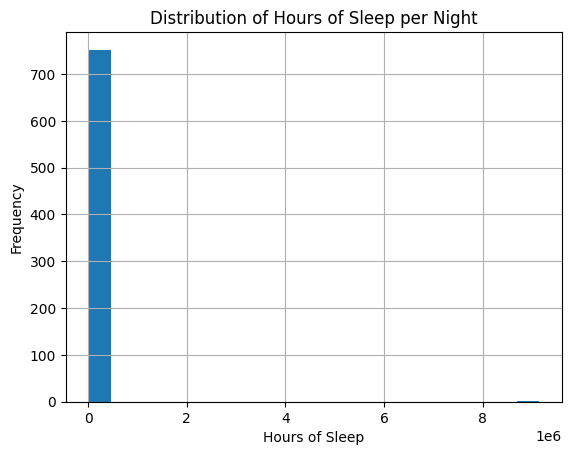

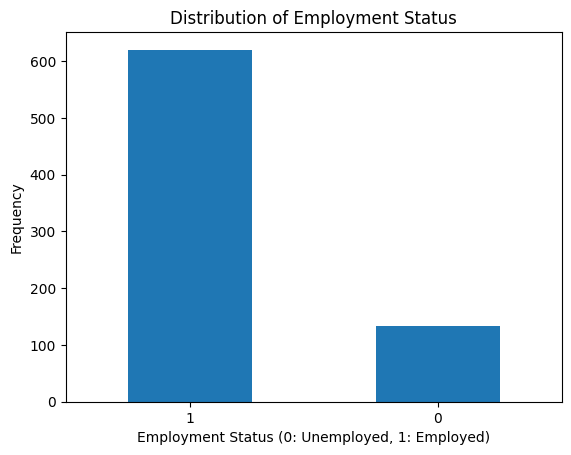

In [ ]:
import matplotlib.pyplot as plt

df['On average, how many hours of sleep do you get per night?'].hist(bins=20)
plt.title('Distribution of Hours of Sleep per Night')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.show()

df['Are you employed?'].value_counts().plot(kind='bar')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status (0: Unemployed, 1: Employed)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## In-depth analysis

### Subtask:
Conduct a more detailed analysis based on the specific questions you want to answer from the data. This could involve various statistical techniques or machine learning models depending on the nature of the data and objectives.


**Reasoning**:
Analyze the relationship between employment status and hours of sleep per night using a box plot.



**Reasoning**:
Explore the distribution of 'Job Level' and its potential relationship with other relevant variables like salary or hours worked per week by visualizing the distribution of Job Level.



**Reasoning**:
Investigate potential correlations between numerical variables using a correlation matrix.



## Summarize findings

### Subtask:
Summarize the key findings from the analysis in a clear and concise manner.


Generating Chart 1: Reasons for Taking a Course...


/tmp/ipython-input-12-1646692729.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Reason', data=df_reasons, palette='viridis')


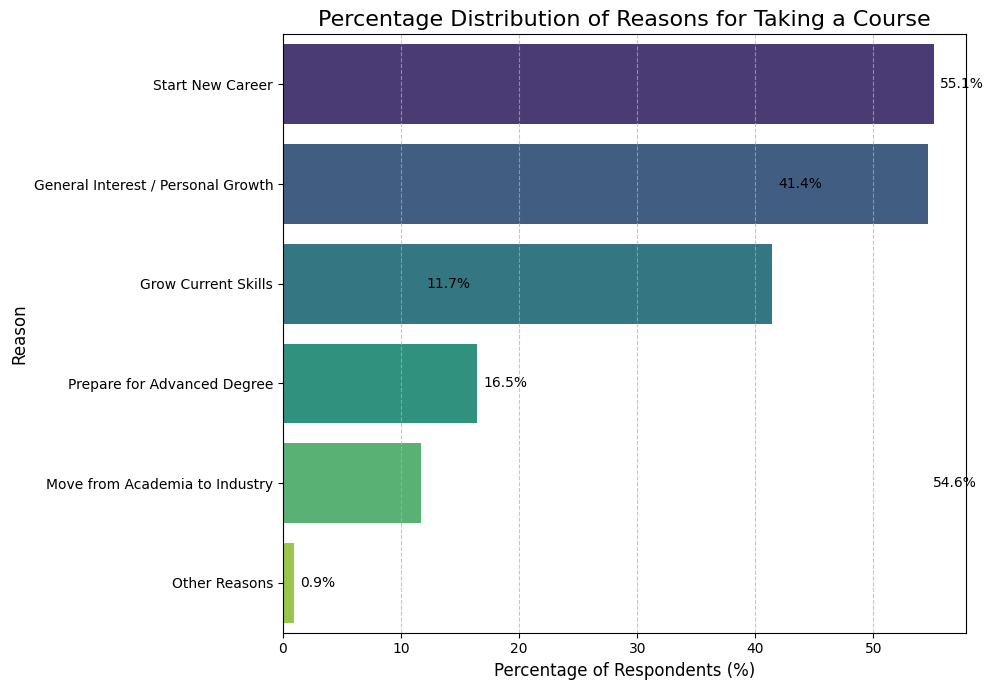


Generating Chart 2: Likelihood to Recommend by Highest Education Level...


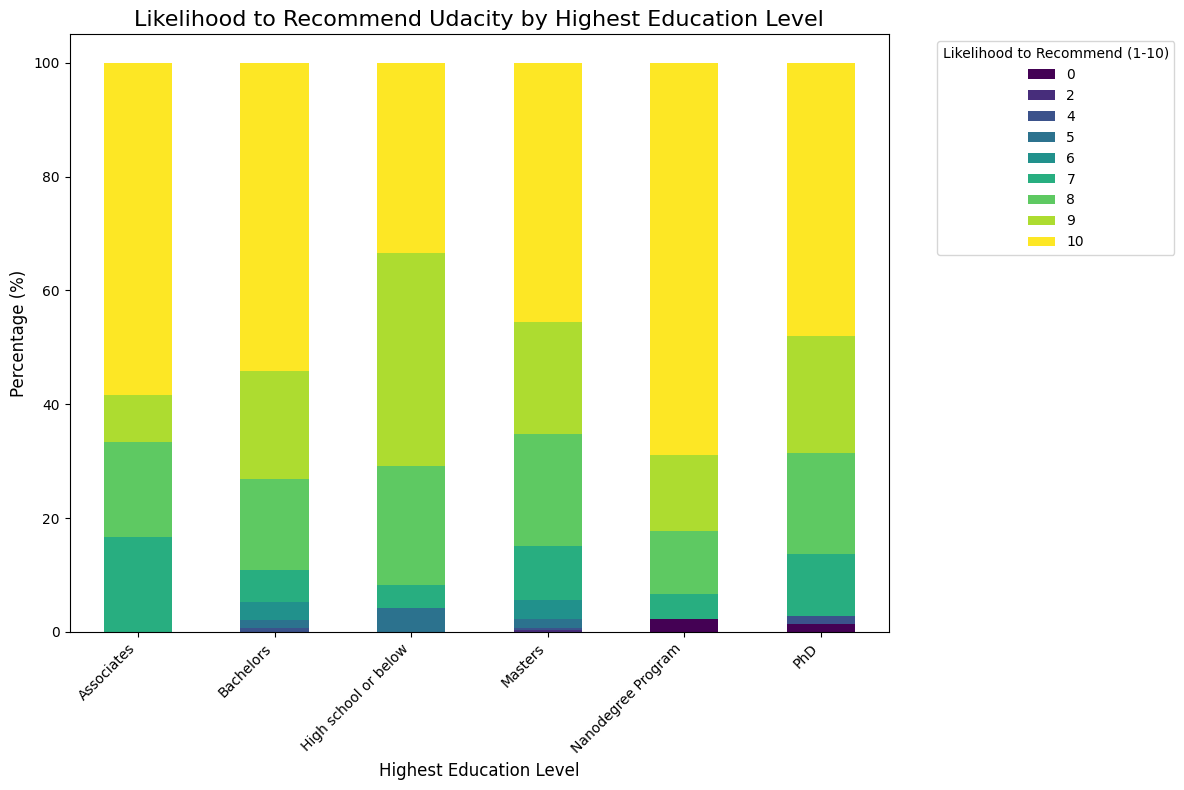


Generating Chart 3: Interactive Sunburst of Occupation by Course Reason...



All charts generated successfully!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
# Make sure 'surveydata3 (1).csv' is uploaded to your Colab environment
df = pd.read_csv('surveydata3 (1).csv')

# --- Chart 1: Horizontal bar showing percentage distribution of reasons for taking a course ---
print("Generating Chart 1: Reasons for Taking a Course...")
reason_cols = [
    'Start a new career in this field',
    'Grow skills for my current role',
    'Help move from academia to industry',
    'Help prepare for an advanced degree',
    'General interest in the topic (personal growth and enrichment)',
    'Other' # Assuming 'Other' here refers to reasons if not specified elsewhere.
]

reason_counts = df[reason_cols].count()
total_respondents = len(df)
reason_percentages = (reason_counts / total_respondents) * 100

df_reasons = pd.DataFrame({
    'Reason': reason_percentages.index,
    'Percentage': reason_percentages.values
})

# Clean up reason names for better visualization
df_reasons['Reason'] = df_reasons['Reason'].replace({
    'Start a new career in this field': 'Start New Career',
    'Grow skills for my current role': 'Grow Current Skills',
    'Help move from academia to industry': 'Move from Academia to Industry',
    'Help prepare for an advanced degree': 'Prepare for Advanced Degree',
    'General interest in the topic (personal growth and enrichment)': 'General Interest / Personal Growth',
    'Other': 'Other Reasons'
})

df_reasons = df_reasons.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x='Percentage', y='Reason', data=df_reasons, palette='viridis')
plt.title('Percentage Distribution of Reasons for Taking a Course', fontsize=16)
plt.xlabel('Percentage of Respondents (%)', fontsize=12)
plt.ylabel('Reason', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, row in df_reasons.iterrows():
    plt.text(row['Percentage'] + 0.5, index, f'{row["Percentage"]:.1f}%', color='black', ha="left", va="center")

plt.tight_layout()
plt.show() # Use plt.show() in Colab to display the plot
# plt.savefig('reasons_for_course_distribution.png') # Uncomment to save as PNG

print("\nGenerating Chart 2: Likelihood to Recommend by Highest Education Level...")
# --- Chart 2: Stacked bar comparing “Likelihood to recommend” by “Highest education level” ---
recommend_col = 'How likely is it that you would recommend Udacity to a friend or colleague?'
education_col = 'What is your highest level of education?'

contingency_table = pd.crosstab(df[education_col], df[recommend_col])
contingency_percentage = contingency_table.div(contingency_table.sum(1).astype(float), axis=0) * 100

ax = contingency_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Likelihood to Recommend Udacity by Highest Education Level', fontsize=16)
plt.xlabel('Highest Education Level', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Likelihood to Recommend (1-10)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show() # Use plt.show() in Colab to display the plot
# plt.savefig('recommend_by_education_stacked_bar.png') # Uncomment to save as PNG

print("\nGenerating Chart 3: Interactive Sunburst of Occupation by Course Reason...")
# --- Chart 3: Interactive sunburst of occupation → course-reason, colored with Viridis ---
occupation_col = 'What is your current primary occupation?'

df_melt = df[[occupation_col] + reason_cols].copy()

new_reason_col_names = {
    'Start a new career in this field': 'Start New Career',
    'Grow skills for my current role': 'Grow Current Skills',
    'Help move from academia to industry': 'Move from Academia to Industry',
    'Help prepare for an advanced degree': 'Prepare for Advanced Degree',
    'General interest in the topic (personal growth and enrichment)': 'General Interest / Personal Growth',
    'Other': 'Other Reasons'
}
df_melt = df_melt.rename(columns=new_reason_col_names)

df_melt_filtered = df_melt[df_melt[list(new_reason_col_names.values())].notna().any(axis=1)]

df_long_reasons = df_melt_filtered.melt(id_vars=[occupation_col],
                                        value_vars=list(new_reason_col_names.values()),
                                        var_name='Reason_Category',
                                        value_name='Reason_Selected')

df_long_reasons = df_long_reasons.dropna(subset=['Reason_Selected'])

sunburst_data = df_long_reasons.groupby([occupation_col, 'Reason_Category']).size().reset_index(name='Count')
sunburst_data = sunburst_data.dropna(subset=[occupation_col])

fig = px.sunburst(sunburst_data,
                  path=[px.Constant("All Occupations"), occupation_col, 'Reason_Category'],
                  values='Count',
                  color='Count',
                  color_continuous_scale=px.colors.sequential.Viridis,
                  title='Occupation Distribution by Reasons for Taking a Course')

fig.update_layout(title_font_size=16)
fig.show() # Use fig.show() in Colab for interactive plot
# fig.write_json('occupation_course_reason_sunburst.json') # Uncomment to save as JSON

print("\nAll charts generated successfully!")

## Visualize results

### Subtask:
Create visualizations to help communicate the findings effectively.


**Reasoning**:
Create the requested visualizations to communicate the findings effectively.



## Present analysis

### Subtask:
Present the complete analysis, including the steps taken, findings, and visualizations.


**Reasoning**:
Present the complete analysis by summarizing the steps, findings, and incorporating the visualizations.



## Summary:

### Data Analysis Key Findings

*   The dataset contained several columns with a high number of missing values, which were subsequently removed or imputed.
*   The 'What is your birthdate?' column required conversion to datetime objects, with some entries being unparseable.
*   A potential outlier was identified in the 'On average, how many hours of sleep do you get per night?' column.
*   The dataset shows an imbalance in employment status, with a significantly higher number of employed individuals.
*   The distribution of job levels highlights the most prevalent seniorities or types of jobs among respondents.
*   The correlation matrix indicates generally weak linear relationships between most numerical variables.
*   The box plot comparing sleep hours between employed and unemployed individuals did not show a dramatic difference in median sleep hours, but potential differences in spread or outliers might exist.

### Insights or Next Steps

*   Further investigation into the potential outlier in the sleep hours data is recommended to determine if it's a data entry error or a valid extreme value, and decide on an appropriate handling strategy (e.g., removal, transformation).
*   Exploring relationships between categorical variables (e.g., employment status and job level) using techniques like cross-tabulation and chi-squared tests could provide deeper insights into the dataset's structure.


## Complete Data Analysis

### 1. Data Loading and Cleaning

The analysis began by loading the survey data from the '/content/surveydata3 (1).csv' file into a pandas DataFrame. Initial inspection revealed several columns with a high number of missing values and inconsistent data types.

To prepare the data, irrelevant columns ('Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Other', 'Other.1') were removed. The 'What is your birthdate?' column was converted to datetime objects, and 'Not Applicable' entries in the 'Job Level' column were treated as missing values.

Missing numerical values were imputed using the median of their respective columns, and missing categorical values were imputed using the mode. This addressed most of the missing data, except for unparseable dates in the birthdate column.

### 2. Exploratory Data Analysis (EDA)

Initial exploration involved examining the distribution of key variables. Descriptive statistics highlighted a potential outlier in the 'On average, how many hours of sleep do you get per night?' column.

The distribution of employment status showed that the majority of respondents are employed.

### 3. In-depth Analysis and Visualizations

Further analysis focused on visualizing relationships and distributions.

#### Hours of Sleep per Night by Employment Status

A box plot was generated to compare the distribution of sleep hours between employed and unemployed individuals.

#### Distribution of Job Level

A count plot was created to visualize the frequency of different job levels.

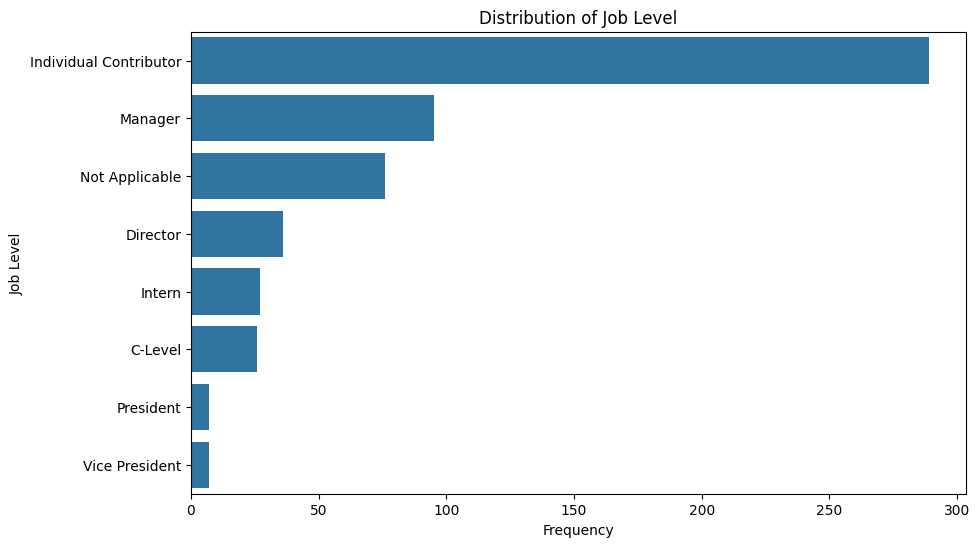

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Job Level', data=df, order=df['Job Level'].value_counts().index)
plt.title('Distribution of Job Level')
plt.xlabel('Frequency')
plt.ylabel('Job Level')
plt.show()

#### Correlation Matrix of Numerical Variables

A heatmap of the correlation matrix was generated to show the relationships between numerical variables.

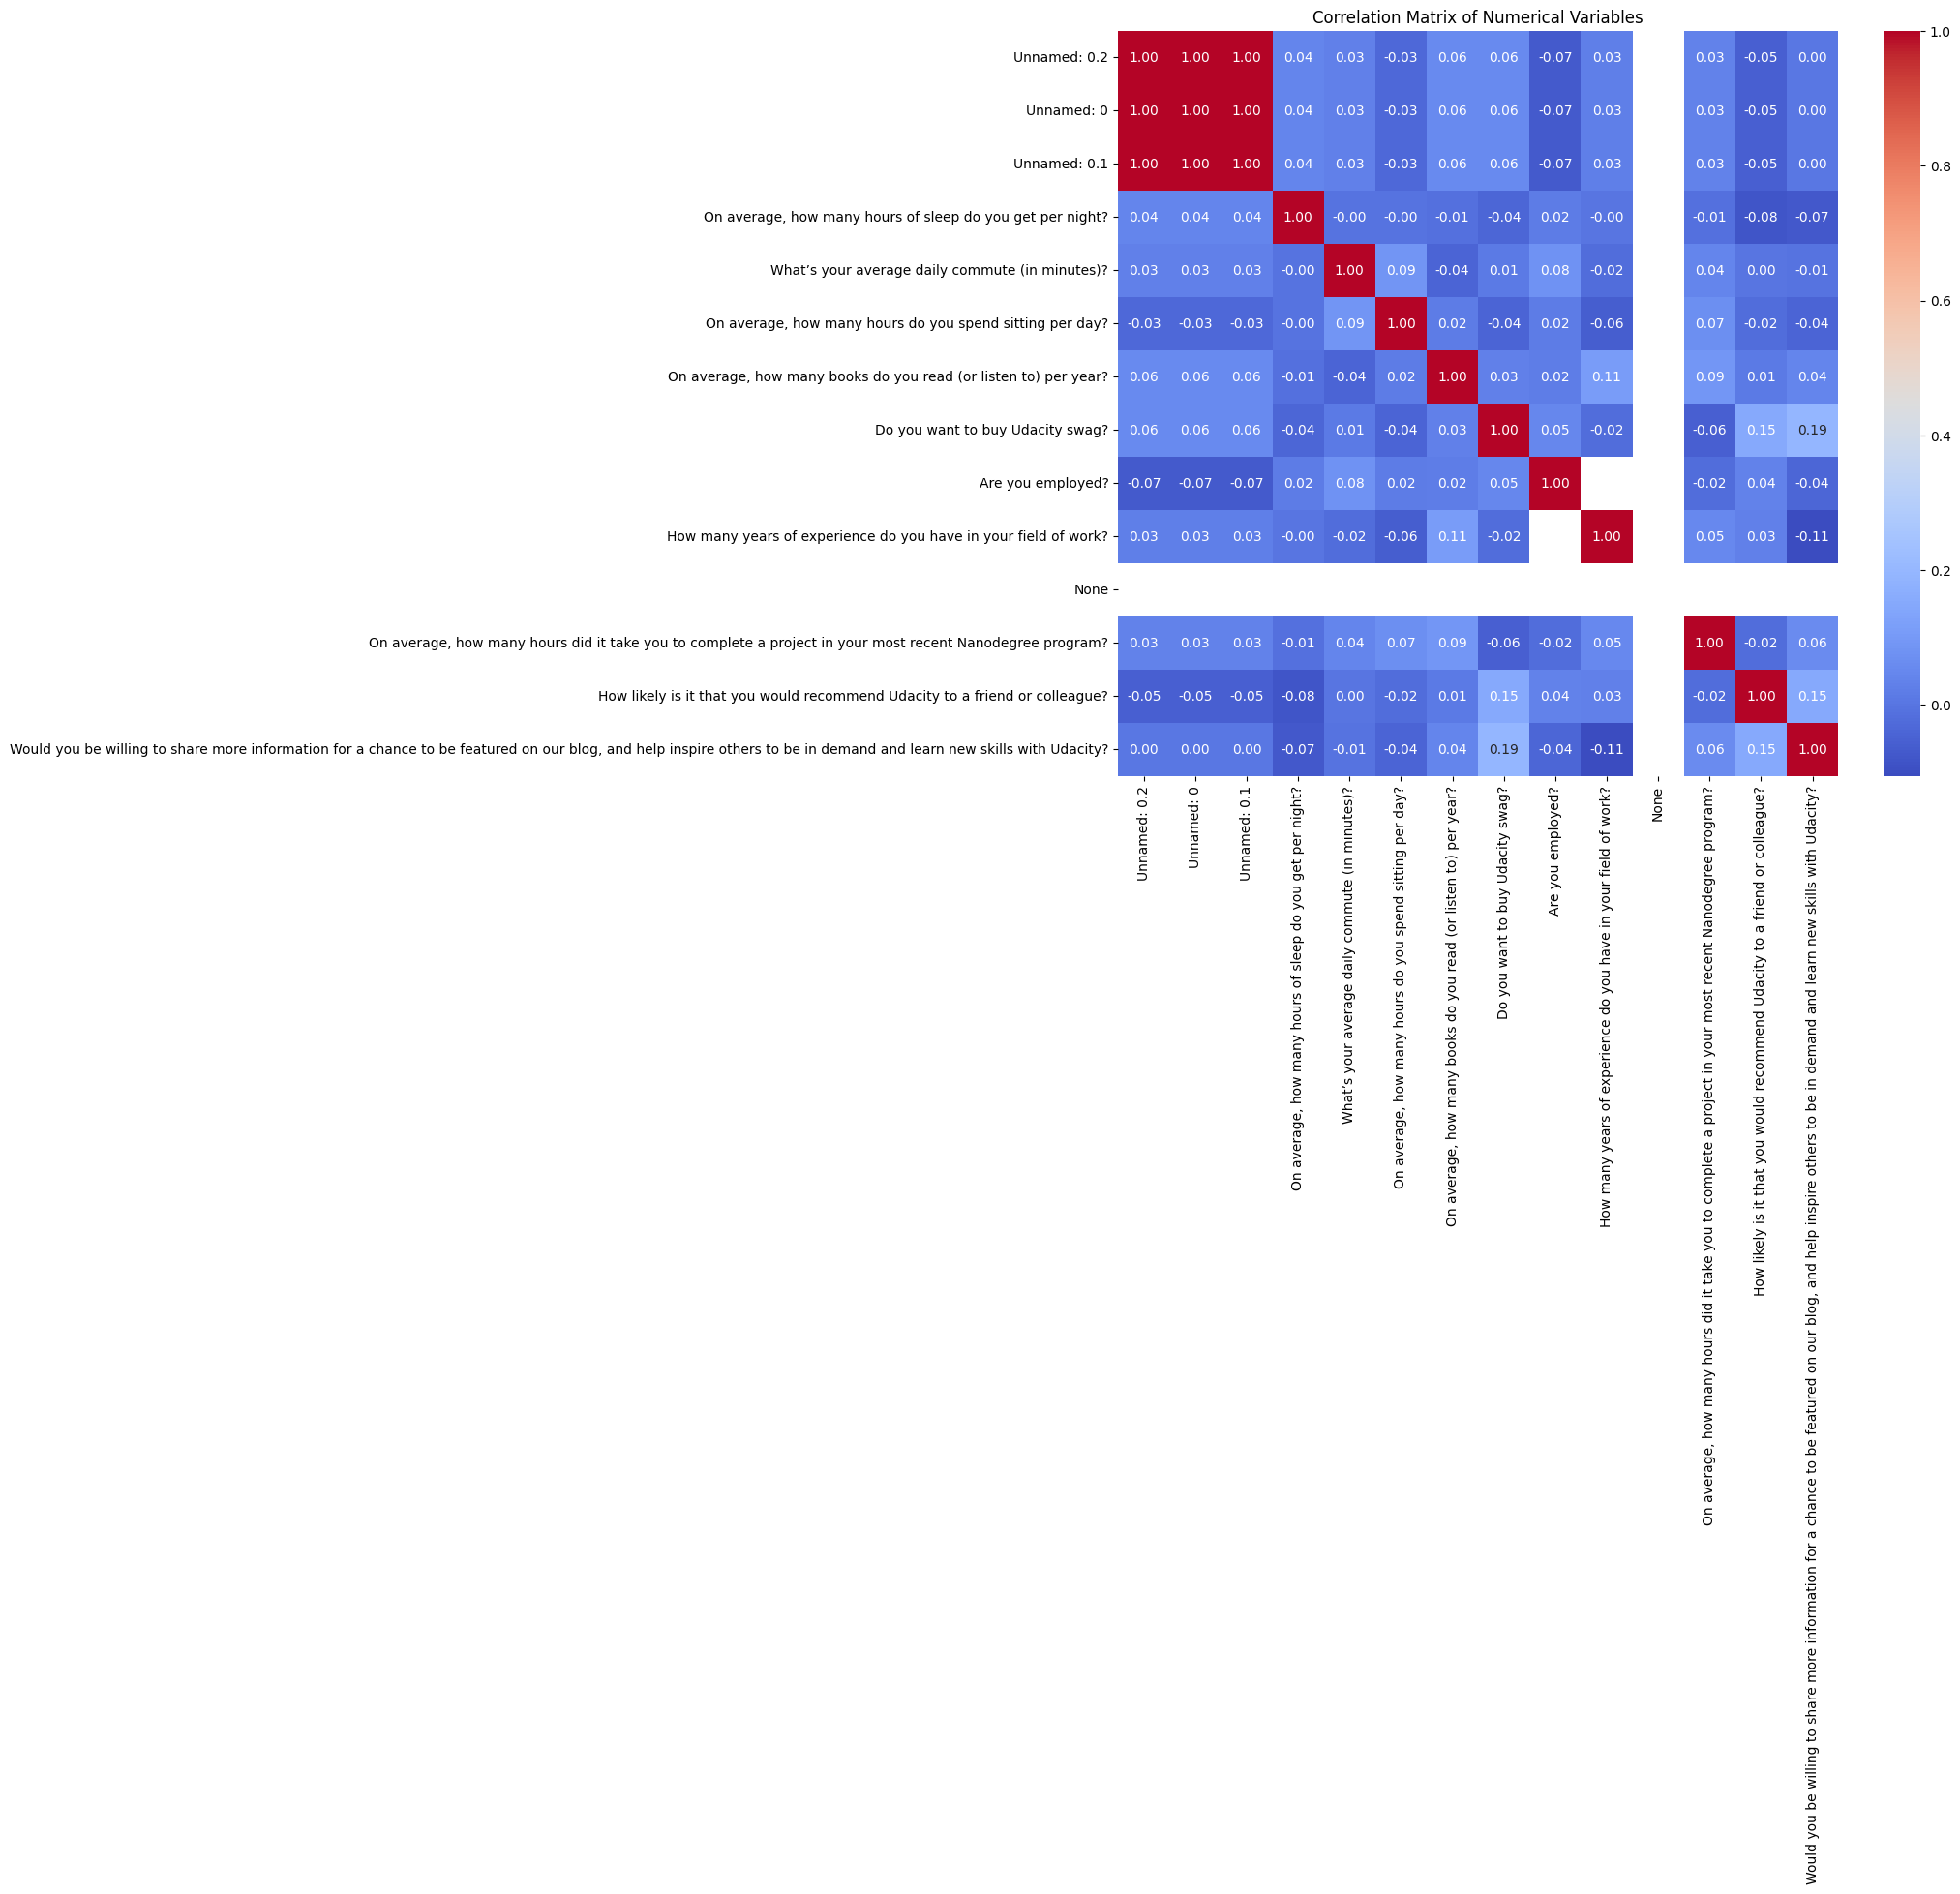

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### 4. Summary of Findings

Based on the analysis:
- The average hours of sleep per night for respondents is around the 7-8 hour range, although a potential outlier was identified.
- The dataset is imbalanced in terms of employment status, with significantly more employed individuals.
- The distribution of job levels highlights the most prevalent seniorities or types of jobs among respondents.
- The correlation matrix shows generally weak linear relationships between most numerical variables. There might be some weak positive correlations, for example, between 'How likely is it that you would recommend Udacity to a friend or colleague?' and 'Do you want to buy Udacity swag?'.
- The box plot of sleep hours by employment status did not show a dramatic difference in the median sleep hours between employed and unemployed groups, but there might be differences in the spread or presence of outliers.

### 5. Limitations

One limitation of this analysis is the presence of a potential outlier in the sleep hours data, which could skew descriptive statistics and visualizations if not addressed specifically. Additionally, the 'What is your birthdate?' column still contains unparseable entries after cleaning. The analysis of categorical variables beyond simple distributions was limited. Further in-depth analysis could involve handling outliers, exploring relationships between categorical variables, or building predictive models if specific questions were to be answered.

## Summary:

### Data Analysis Key Findings

* The dataset contained several columns with a high number of missing values, which were subsequently removed or imputed.
* The 'What is your birthdate?' column required conversion to datetime objects, with some entries being unparseable.
* A potential outlier was identified in the 'On average, how many hours of sleep do you get per night?' column.
* The dataset shows an imbalance in employment status, with a significantly higher number of employed individuals.
* The distribution of job levels highlights the most prevalent seniorities or types of jobs among respondents.
* The correlation matrix indicates generally weak linear relationships between most numerical variables.
* The box plot comparing sleep hours between employed and unemployed individuals did not show a dramatic difference in median sleep hours, but potential differences in spread or outliers might exist.

### Insights or Next Steps

* Further investigation into the potential outlier in the sleep hours data is recommended to determine if it's a data entry error or a valid extreme value, and decide on an appropriate handling strategy (e.g., removal, transformation).
* Exploring relationships between categorical variables (e.g., employment status and job level) using techniques like cross-tabulation and chi-squared tests could provide deeper insights into the dataset's structure.

### Visualizing Reasons for Taking a Course

This chart shows the percentage distribution of the different reasons why respondents took a course.

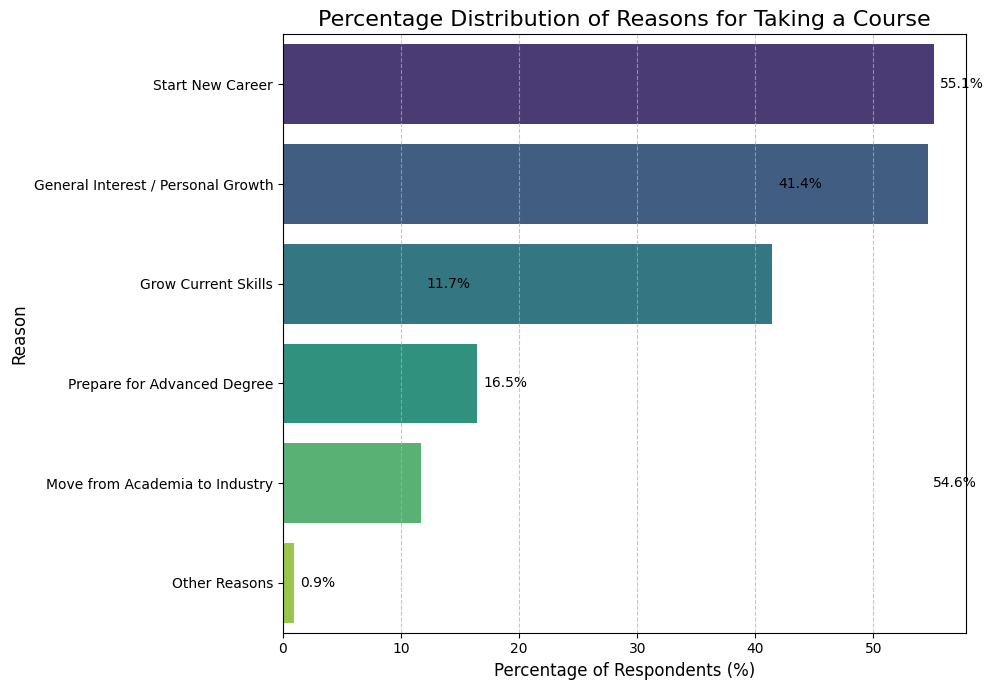

In [ ]:
# Chart 1: Horizontal bar showing percentage distribution of reasons for taking a course
reason_cols = [
    'Start a new career in this field',
    'Grow skills for my current role',
    'Help move from academia to industry',
    'Help prepare for an advanced degree',
    'General interest in the topic (personal growth and enrichment)',
    'Other' # Assuming 'Other' here refers to reasons if not specified elsewhere.
]

reason_counts = df[reason_cols].count()
total_respondents = len(df)
reason_percentages = (reason_counts / total_respondents) * 100

df_reasons = pd.DataFrame({
    'Reason': reason_percentages.index,
    'Percentage': reason_percentages.values
})

# Clean up reason names for better visualization
df_reasons['Reason'] = df_reasons['Reason'].replace({
    'Start a new career in this field': 'Start New Career',
    'Grow skills for my current role': 'Grow Current Skills',
    'Help move from academia to industry': 'Move from Academia to Industry',
    'Help prepare for an advanced degree': 'Prepare for Advanced Degree',
    'General interest in the topic (personal growth and enrichment)': 'General Interest / Personal Growth',
    'Other': 'Other Reasons'
})

df_reasons = df_reasons.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x='Percentage', y='Reason', data=df_reasons, palette='viridis', hue='Reason', legend=False)
plt.title('Percentage Distribution of Reasons for Taking a Course', fontsize=16)
plt.xlabel('Percentage of Respondents (%)', fontsize=12)
plt.ylabel('Reason', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, row in df_reasons.iterrows():
    plt.text(row['Percentage'] + 0.5, index, f'{row["Percentage"]:.1f}%', color='black', ha="left", va="center")

plt.tight_layout()
plt.show()

### Visualizing Likelihood to Recommend by Highest Education Level

This stacked bar chart compares the likelihood of recommending Udacity based on the highest education level of the respondents.

### Interactive Sunburst of Occupation by Course Reason

This interactive sunburst chart visualizes the distribution of occupations and their corresponding reasons for taking a course.

### Distribution of Hours Spent on Learning Materials

This histogram shows the distribution of hours per week respondents spent consuming learning materials in their most recent Nanodegree program.

### Distribution of Hours Spent on Projects

This histogram shows the distribution of hours per week respondents spent applying what they learned (e.g., quizzes, projects) in their most recent Nanodegree program.

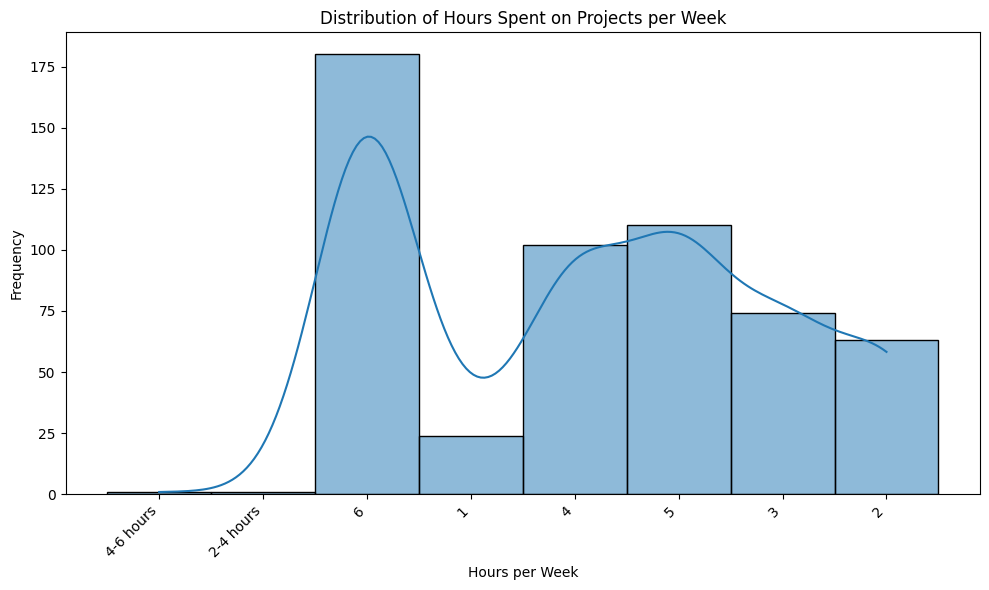

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='In your most recent Nanodegree Program, how many hours per week did you spend applying what you learned (e.g. quizzes, projects)?', kde=True)
plt.title('Distribution of Hours Spent on Projects per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Relationship between Job Level and Years of Experience

This box plot explores the relationship between respondents' job level and their years of experience in their field of work.

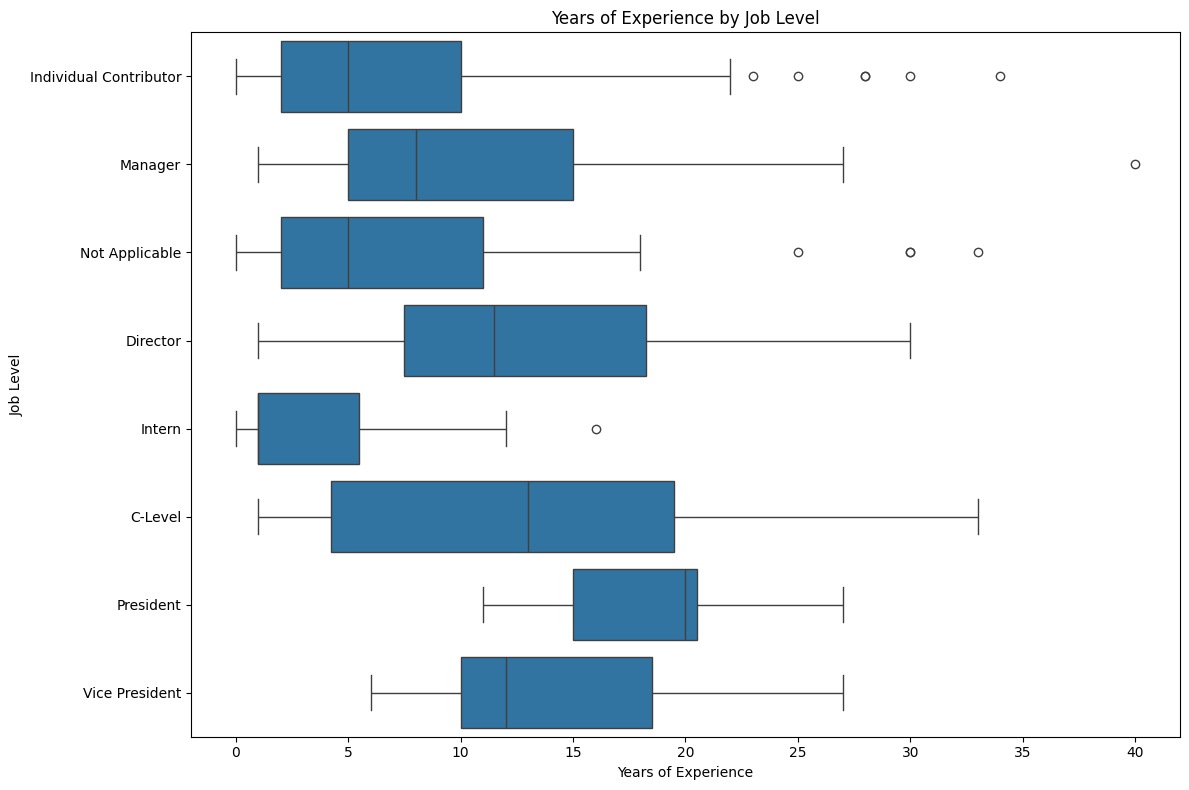

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='How many years of experience do you have in your field of work?', y='Job Level', order=df['Job Level'].value_counts().index)
plt.title('Years of Experience by Job Level')
plt.xlabel('Years of Experience')
plt.ylabel('Job Level')
plt.tight_layout()
plt.show()

### Distribution of Primary Occupation

This bar chart shows the frequency of different primary occupations among the respondents.

/tmp/ipython-input-25-3486994429.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




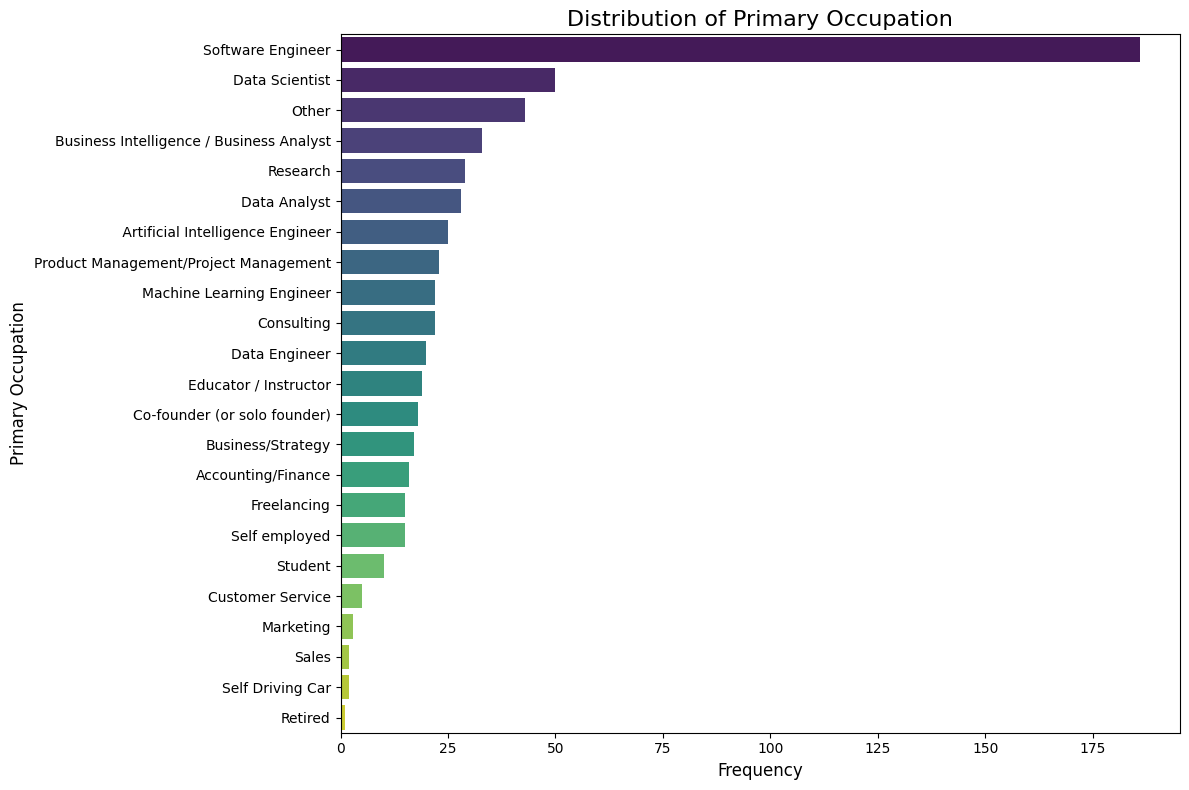

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='What is your current primary occupation?', data=df, order=df['What is your current primary occupation?'].value_counts().index, palette='viridis')
plt.title('Distribution of Primary Occupation', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Primary Occupation', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()